# Compute mutation profiles
"Mutation profile": Number of positions with one mutation, number of positions with two mutations, etc.

**IMPORTANT NOTE**: We omit 0 values from mutation profile plots (i.e. numbers of mutations where 0 positions have exactly that many mutations). This both unclutters the plots AND lets us use normal log scales without problems. Plotting 0 values in a log scale is doable using pyplot's symlog option, but this isn't necessary for these plots at least.

(it's not really an "important note", but I spent like an hour trying to understand this when recreating these plots elsewhere...)

In [1]:
%run "Header.ipynb"
%run "LoadMutationJSONData.ipynb"
%run "GeneUtils.ipynb"

In [2]:
from collections import defaultdict
import os

def get_mutation_profile(seq):
    num_mutations_to_freq = defaultdict(int)
    for pos in seq2pos2matchct[seq]:
        mismatch_and_match_ct = seq2pos2matchct[seq][pos] + seq2pos2mismatchct[seq][pos]
        # ignore uncovered places. Could also ignore places with less than some threshold coverage (e.g. 5).
        if mismatch_and_match_ct == 0:
            continue
        num_mutations_to_freq[seq2pos2mismatchct[seq][pos]] += 1
    return num_mutations_to_freq

def view_mutation_profiles(axes, xlim_max=None, ylim_max=None, logscale=False):
    # axes should be an array of length SEQS
    for col, seq in enumerate(SEQS):
        num_mutations_to_freq = get_mutation_profile(seq)
        
        # .keys() and .values() should be in the same order: https://stackoverflow.com/a/835430
        axes[col].scatter(num_mutations_to_freq.keys(), num_mutations_to_freq.values(), c=SCATTERPLOT_PT_COLOR)
        
        ylabel = "How many positions have\nthis many mutations?"
        if logscale:
            # https://stackoverflow.com/a/14530857
            axes[col].set_yscale("log")
            ylabel += " (log$_{10}$ scale)"
        axes[col].set_xlabel("Number of mutations")
        if col == 0:
            axes[col].set_ylabel(ylabel)
        
        title = "{}".format(seq2name[seq])
        
        if ylim_max is None:
            axes[col].set_ylim(0)
        else:
            axes[col].set_ylim(0, ylim_max)
            title += " (y-axis truncated to {})".format(ylim_max)
        if xlim_max is None:
            axes[col].set_xlim(0)
        else:
            axes[col].set_xlim(0, xlim_max)
            title += " (x-axis truncated to {})".format(xlim_max)
        axes[col].set_title(title)
        use_thousands_sep(axes[col].get_xaxis())

## Plot mutation profiles

/home/mfedarko/miniconda3/envs/mut-analyses/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


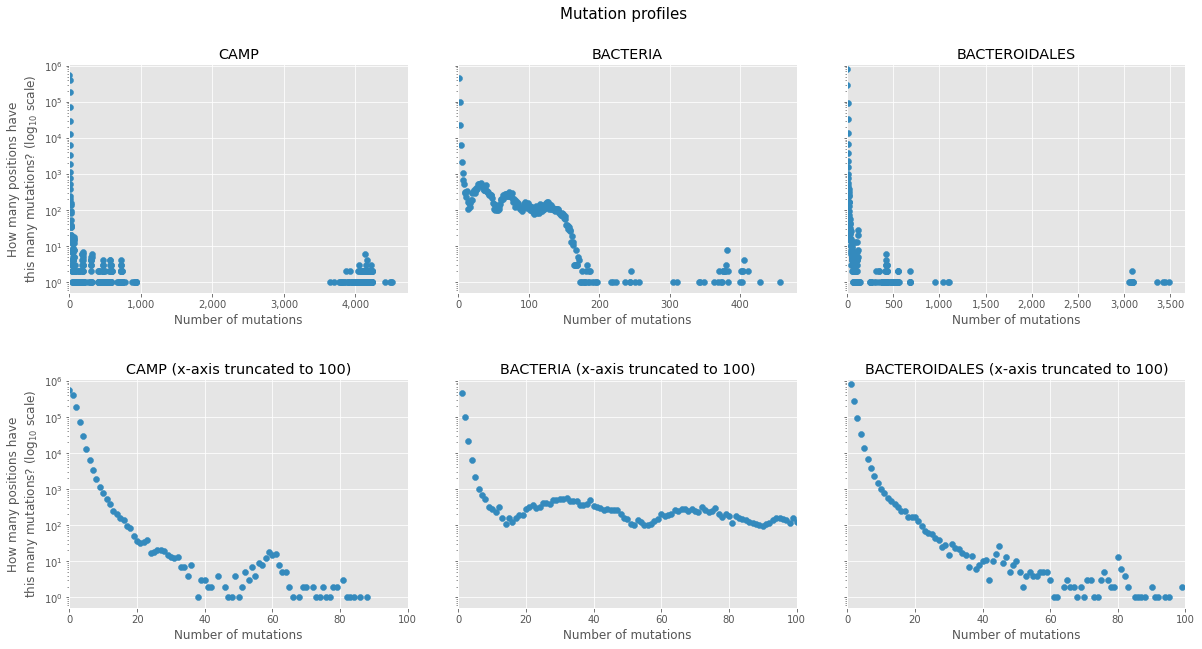

In [3]:
fig, axes = pyplot.subplots(2, 3, sharey=True, gridspec_kw={"hspace": 0.38, "wspace": 0.15})

# First row: full
view_mutation_profiles(axes[0, :], logscale=True)
# Second row: truncated to x=100
view_mutation_profiles(axes[1, :], xlim_max=100, logscale=True)

fig.suptitle(
    "Mutation profiles",
    fontsize="15",
    # for whatever reason this is horizontally a bit too far left from what i can tell -
    # positioning it manually -- see https://stackoverflow.com/a/46953206
    x=0.51,
    y=0.96
)
fig.set_size_inches(20, 10)
fig.savefig("figs/mutation-profiles.png", bbox_inches="tight")